In [1]:
import numpy as np
from tensorflow.keras.layers import Dense , Dropout, Input
from tensorflow.keras.layers import Conv2D , MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [2]:
from tensorflow.keras.utils import to_categorical 

In [3]:
(x_train, y_train) , (x_test,y_test) = mnist.load_data()

In [4]:
y_train[5]

2

In [5]:
num_labels = len(np.unique(y_train))

In [6]:
num_labels

10

In [7]:
y_train = to_categorical(y_train)

In [8]:
y_test = to_categorical(y_test)

In [9]:
image_size = x_train.shape[1]

In [10]:
x_train = np.reshape(x_train ,[-1, image_size , image_size , 1 ])

In [11]:
x_test = np.reshape(x_test ,[-1, image_size , image_size , 1 ])

In [12]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [13]:
input_shape = (image_size , image_size , 1 )
batch_size = 128
kernel_size = 3
filters = 64
drop_outs = 0.3

In [41]:
inputs = Input(shape=input_shape)
y = Conv2D(filters = filters , kernel_size = kernel_size,activation = 'relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters = filters, kernel_size = kernel_size, activation= 'relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters = filters , kernel_size = kernel_size, activation = 'relu')(y)
y = Flatten()(y)
y = Dropout(drop_outs)(y)
outputs = Dense(num_labels, activation = 'softmax')(y)
model = Model(inputs =[inputs,inputs] , outputs=outputs )
model.summary()

ValueError: The list of inputs passed to the model is redundant. All inputs should only appear once. Found: [<tf.Tensor 'input_10:0' shape=(None, 28, 28, 1) dtype=float32>, <tf.Tensor 'input_10:0' shape=(None, 28, 28, 1) dtype=float32>]

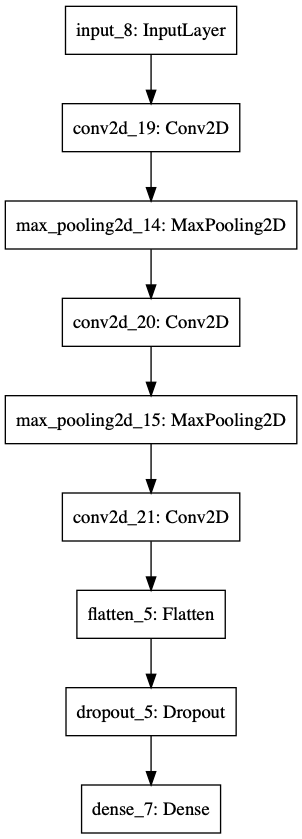

In [39]:
plot_model(model)

In [26]:
model.compile(loss = 'categorical_crossentropy' , optimizer ='adam' , metrics =['accuracy'])

In [27]:
model.fit(x_train , y_train , validation_data=(x_test , y_test) , epochs = 1 , batch_size= batch_size)

469/469 [==============================] - 37s 79ms/step - loss: 0.5721 - dense_2_loss: 0.2861 - dense_2_1_loss: 0.2861 - dense_2_accuracy: 0.9107 - dense_2_1_accuracy: 0.9107 - val_loss: 0.1148 - val_dense_2_loss: 0.0574 - val_dense_2_1_loss: 0.0574 - val_dense_2_accuracy: 0.9815 - val_dense_2_1_accuracy: 0.9815


In [28]:
score = model.evaluate(x_test , y_test, batch_size= batch_size)

79/79 [==============================] - 1s 17ms/step - loss: 0.1148 - dense_2_loss: 0.0574 - dense_2_1_loss: 0.0574 - dense_2_accuracy: 0.9815 - dense_2_1_accuracy: 0.9815


In [18]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 98.2%


In [19]:
from tensorflow.keras.utils import plot_model

In [20]:
import graphviz

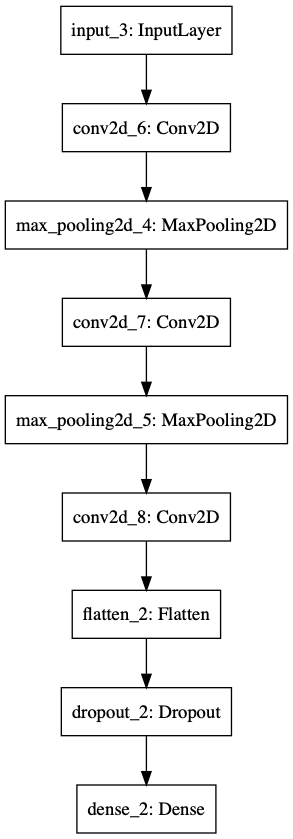

In [30]:
plot_model(model)